In [5]:
import pandas as pd 
import numpy as np  
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import requests as req
import csv
from pandas import Series

from pandas import DataFrame
from scipy.stats import boxcox
import re
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [6]:
#loading in movies data and checking for any null values 
movies = pd.read_csv('movies_metadata.csv', sep=',')
print(movies.isnull().sum())
movies.head()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


/var/folders/qv/r6d6hhgj41z1cg7db108r4lh0000gn/T/ipykernel_60676/1142919973.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv', sep=',')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
#Reading in credits 
credits = pd.read_csv('credits.csv',sep=',')
print(credits.isnull().sum())
credits.head()

cast    0
crew    0
id      0
dtype: int64


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
#loading in ratings data. Ratings are from 1-5
ratings = pd.read_csv("ratings.csv", sep=',')
print(ratings.isnull().sum())
ratings.head()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [9]:
#changing movieID to id for merge later on 
ratings2 = ratings.rename(columns={'movieId': 'id'})

In [10]:
ratings2

,userId,id,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [12]:
#dropping unnecessary columns
dropped = ["homepage", "poster_path", "video", "imdb_id",  "original_title", "tagline"]
movies = movies.drop(dropped, axis=1)

In [13]:
movies

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0
45464,False,NaN,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0


In [10]:
count_missing_title = movies['title'].isna().sum()
print(count_missing_title)

6


In [14]:
#dropping movies that don't have a title 
movies.dropna(subset=["title"], inplace=True)

In [15]:
#changing belongs to collection to binary 1 = true 0 = false 
#collection they belong to is movie title 
movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna("None")
movies['belongs_to_collection'] = (movies['belongs_to_collection'] != "None").astype(int)

In [16]:
movies

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,False,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,False,1,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,False,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,False,1,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0
45462,False,0,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0
45463,False,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0
45464,False,0,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0


In [14]:
#seeing the counts of status column
movies["status"].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [15]:
#seeing the counts of adult column
#should we drop this column? Only 9 adult films in dataset 
movies["adult"].value_counts()

False    45451
True         9
Name: adult, dtype: int64

In [17]:
#creating function to change json list into input 
def json_to_arr(cell, wanted = "name"): 
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [28]:
from ast import literal_eval
import ast as ast

In [19]:
#adding function to json columns
movies[['genres']] = movies[['genres']].applymap(json_to_arr)
movies[['production_countries']] = movies[['production_countries']].applymap(lambda row: 
                                                                     json_to_arr(row, "iso_3166_1"))
movies[['production_companies']] = movies[['production_companies']].applymap(json_to_arr)

In [20]:
movies[['spoken_languages']] = movies[['spoken_languages']].applymap(json_to_arr)

In [21]:
movies[['genres', 'production_countries','production_companies', 'spoken_languages']]

,genres,production_countries,production_companies,spoken_languages
0,"[Animation, Comedy, Family]",[US],[Pixar Animation Studios],[English]
1,"[Adventure, Fantasy, Family]",[US],"[TriStar Pictures, Teitler Film, Interscope Co...","[English, Français]"
2,"[Romance, Comedy]",[US],"[Warner Bros., Lancaster Gate]",[English]
3,"[Comedy, Drama, Romance]",[US],[Twentieth Century Fox Film Corporation],[English]
4,[Comedy],[US],"[Sandollar Productions, Touchstone Pictures]",[English]
...,...,...,...,...
45461,"[Drama, Family]",[IR],NaN,[فارسی]
45462,[Drama],[PH],[Sine Olivia],[]
45463,"[Action, Drama, Thriller]",[US],[American World Pictures],[English]
45464,NaN,[RU],[Yermoliev],NaN


In [22]:
movies

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,1,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,[English],Released,Toy Story,7.7,5415.0
1,False,0,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Jumanji,6.9,2413.0
2,False,1,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0.0,101.0,[English],Released,Grumpier Old Men,6.5,92.0
3,False,0,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,[English],Released,Waiting to Exhale,6.1,34.0
4,False,1,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,[English],Released,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,0,"[Drama, Family]",439050,fa,Rising and falling between a man and woman.,0.072051,NaN,[IR],NaN,0.0,90.0,[فارسی],Released,Subdue,4.0,1.0
45462,False,0,0,[Drama],111109,tl,An artist struggles to finish his work while a...,0.178241,[Sine Olivia],[PH],2011-11-17,0.0,360.0,[],Released,Century of Birthing,9.0,3.0
45463,False,0,0,"[Action, Drama, Thriller]",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[US],2003-08-01,0.0,90.0,[English],Released,Betrayal,3.8,6.0
45464,False,0,0,NaN,227506,en,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],[RU],1917-10-21,0.0,87.0,NaN,Released,Satan Triumphant,0.0,0.0


In [23]:
#empty values count
null_counts = movies.isna().sum()
print(null_counts)

adult                        0
belongs_to_collection        0
budget                       0
genres                    2442
id                           0
original_language           11
overview                   954
popularity                   0
production_companies     11875
production_countries      6282
release_date                84
revenue                      0
runtime                    257
spoken_languages          3829
status                      81
title                        0
vote_average                 0
vote_count                   0
dtype: int64


In [22]:
movies['id'] = movies['id'].astype('float')

In [132]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   adult                               45460 non-null  object 
 1   belongs_to_collection               45460 non-null  int64  
 2   budget                              45460 non-null  object 
 3   genres                              45460 non-null  object 
 4   id                                  45460 non-null  object 
 5   original_language                   45449 non-null  object 
 6   overview                            45460 non-null  object 
 7   popularity                          45460 non-null  object 
 8   production_companies                45460 non-null  object 
 9   production_countries                45460 non-null  object 
 10  release_date                        45460 non-null  object 
 11  revenue                             45460

In [133]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [23]:
#cleaning credits dataset
merged_movies = pd.merge(movies,credits,on='id')
merged_movies.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,False,1,30000000,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,[English],Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,0,65000000,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,1,0,"[Romance, Comedy]",15602.0,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0.0,101.0,[English],Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,0,16000000,"[Comedy, Drama, Romance]",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,[English],Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,1,0,[Comedy],11862.0,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,[English],Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [143]:
merged_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45535 entries, 0 to 45534
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   adult                               45535 non-null  object 
 1   belongs_to_collection               45535 non-null  int64  
 2   budget                              45535 non-null  object 
 3   genres                              45535 non-null  object 
 4   id                                  45535 non-null  float64
 5   original_language                   45524 non-null  object 
 6   overview                            45535 non-null  object 
 7   popularity                          45535 non-null  object 
 8   production_companies                45535 non-null  object 
 9   production_countries                45535 non-null  object 
 10  release_date                        45535 non-null  object 
 11  revenue                             45535

In [24]:
merged_movies['budget'] = merged_movies['budget'].astype(float)

In [29]:
#scrub cleaning cast and crew 
merged_movies['cast'] = merged_movies['cast'].map(lambda x: ast.literal_eval(x))
merged_movies['crew'] = merged_movies['crew'].map(lambda x: ast.literal_eval(x))

In [137]:
merged_movies.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,spoken_languages,status,title,vote_average,vote_count,year,production_company_name_only_first,production_companies_name_only,cast,crew
0,False,1,30000000,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],...,[English],Released,Toy Story,7.7,5415.0,1995,Pixar Animation Studios,[0],"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,0,65000000,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],...,"[English, Français]",Released,Jumanji,6.9,2413.0,1995,TriStar Pictures,[0],"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,1,0,"[Romance, Comedy]",15602.0,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[US],...,[English],Released,Grumpier Old Men,6.5,92.0,1995,Warner Bros.,[0],"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,0,16000000,"[Comedy, Drama, Romance]",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],...,[English],Released,Waiting to Exhale,6.1,34.0,1995,Twentieth Century Fox Film Corporation,[0],"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,1,0,[Comedy],11862.0,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],...,[English],Released,Father of the Bride Part II,5.7,173.0,1995,Sandollar Productions,[0],"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [30]:
##Creating profit column
merged_movies['Profit'] = merged_movies['revenue'] - merged_movies['budget']

In [31]:
merged_movies[['release_date', 'runtime']] = merged_movies[['release_date', 'runtime']].fillna(value=0)

In [32]:
merged_movies[['genres', 'status']] = merged_movies[['genres', 'status']].fillna(value='NA')

In [34]:
merged_movies.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   0
production_companies     11896
production_countries      6290
release_date                 0
revenue                      0
runtime                      0
spoken_languages          3835
status                       0
title                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
Profit                       0
dtype: int64

In [29]:
movies

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,1,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,[English],Released,Toy Story,7.7,5415.0
1,False,0,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Jumanji,6.9,2413.0
2,False,1,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0.0,101.0,[English],Released,Grumpier Old Men,6.5,92.0
3,False,0,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,[English],Released,Waiting to Exhale,6.1,34.0
4,False,1,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,[English],Released,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,0,"[Drama, Family]",439050,fa,Rising and falling between a man and woman.,0.072051,NaN,[IR],0,0.0,90.0,[فارسی],Released,Subdue,4.0,1.0
45462,False,0,0,[Drama],111109,tl,An artist struggles to finish his work while a...,0.178241,[Sine Olivia],[PH],2011-11-17,0.0,360.0,[],Released,Century of Birthing,9.0,3.0
45463,False,0,0,"[Action, Drama, Thriller]",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[US],2003-08-01,0.0,90.0,[English],Released,Betrayal,3.8,6.0
45464,False,0,0,NA,227506,en,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],[RU],1917-10-21,0.0,87.0,NaN,Released,Satan Triumphant,0.0,0.0


In [35]:
s = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [36]:
merged_movies['production_companies'] = merged_movies['production_companies'].replace(np.nan,'unknown')
merged_movies['production_countries'] = merged_movies['production_countries'].replace(np.nan,'unknown')
merged_movies['spoken_languages'] = merged_movies['spoken_languages'].replace(np.nan,'unknown')

In [37]:
merged_movies['production_company_name_only_first'] = merged_movies['production_companies'].apply(lambda x: x[0])

In [38]:
merged_movies['production_company_name_only_first']

0                       Pixar Animation Studios
1                              TriStar Pictures
2                                  Warner Bros.
3        Twentieth Century Fox Film Corporation
4                         Sandollar Productions
                          ...                  
45530                                         u
45531                               Sine Olivia
45532                   American World Pictures
45533                                 Yermoliev
45534                                         u
Name: production_company_name_only_first, Length: 45535, dtype: object

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [33]:
movies['title'] = movies['title'].astype('str')
movies['overview'] = movies['overview'].astype('str')

In [34]:
title_corpus = ' '.join(movies['title'])
overview_corpus = ' '.join(movies['overview'])

<AxesSubplot:>

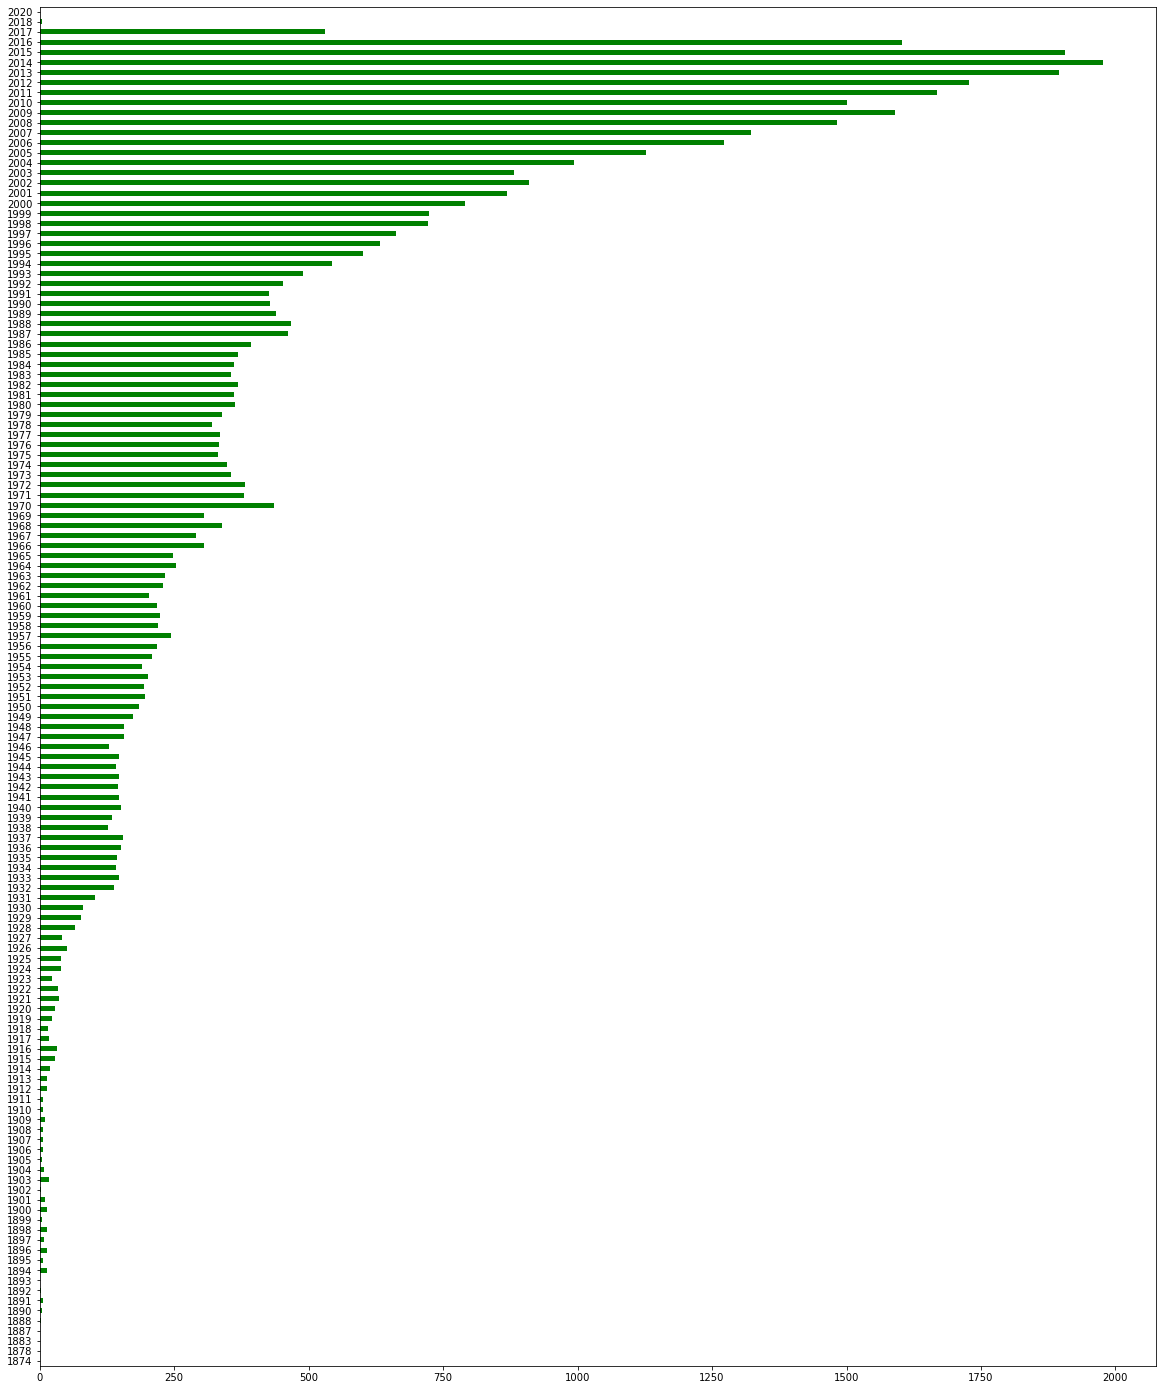

In [147]:
merged_movies.year.value_counts(dropna=False).sort_index().plot(kind='barh',color='g',figsize=(20,25))

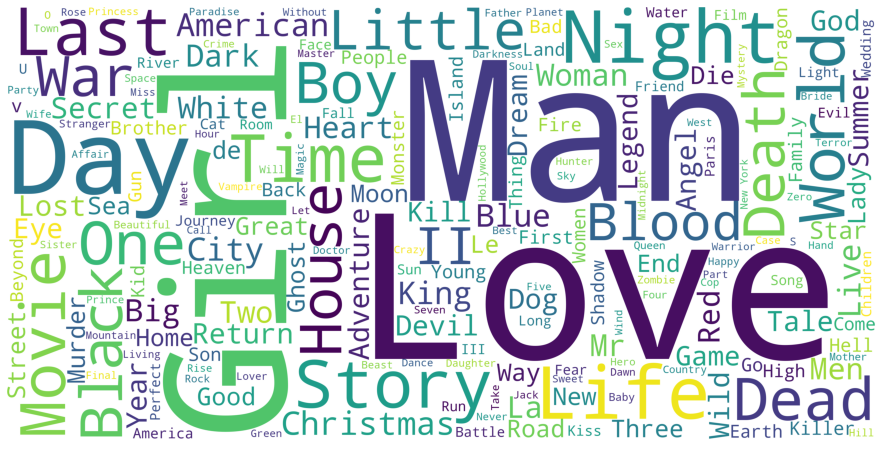

In [35]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

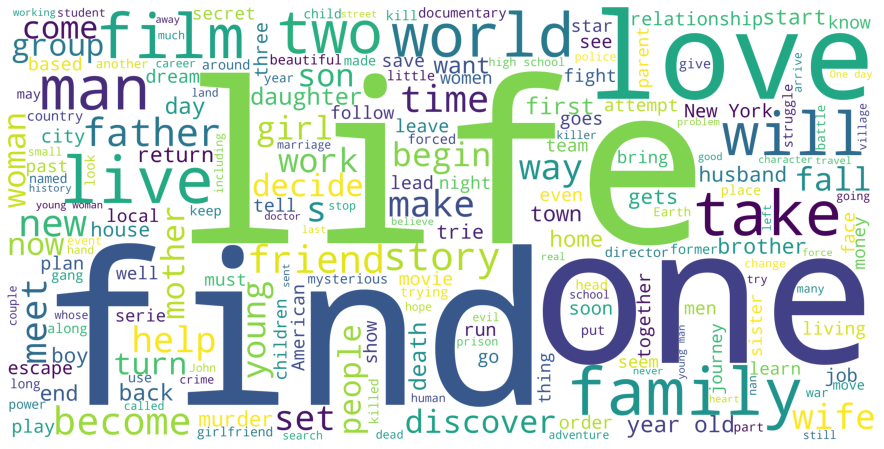

In [36]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [39]:
#Creating year variable from release date
merged_movies['year'] = pd.to_datetime(merged_movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [40]:
merged_movies['year'] = merged_movies['year'].astype('int')

In [41]:
merged_movies['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45530    1970
45531    2011
45532    2003
45533    1917
45534    2017
Name: year, Length: 45535, dtype: int64

In [88]:
##Creating subset of movies after 1990 
movies_sub = merged_movies[merged_movies['year']>=1990]

In [43]:
movies_sub.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,spoken_languages,status,title,vote_average,vote_count,cast,crew,Profit,production_company_name_only_first,year
0,False,1,30000000.0,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],...,[English],Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",343554033.0,Pixar Animation Studios,1995
1,False,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],...,"[English, Français]",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",197797249.0,TriStar Pictures,1995
2,False,1,0.0,"[Romance, Comedy]",15602.0,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[US],...,[English],Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",0.0,Warner Bros.,1995
3,False,0,16000000.0,"[Comedy, Drama, Romance]",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],...,[English],Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",65452156.0,Twentieth Century Fox Film Corporation,1995
4,False,1,0.0,[Comedy],11862.0,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],...,[English],Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",76578911.0,Sandollar Productions,1995


In [89]:
s = movies_sub.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [90]:
s

0            Pixar Animation Studios
1                   TriStar Pictures
1                       Teitler Film
1          Interscope Communications
2                       Warner Bros.
                    ...             
45529            Working Title Films
45529    20th Century Fox Television
45531                    Sine Olivia
45532        American World Pictures
45534                        unknown
Name: companies, Length: 49789, dtype: object

In [91]:
com_df = movies_sub.drop('production_companies', axis=1).join(s)

In [92]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [93]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Universal Pictures,4.858789e+10,1.077337e+08,451
Warner Bros.,4.503166e+10,1.117411e+08,403
Twentieth Century Fox Film Corporation,4.127768e+10,1.495568e+08,276
Paramount Pictures,4.084934e+10,1.201451e+08,340
Walt Disney Pictures,4.012952e+10,1.791496e+08,224
Columbia Pictures,3.123559e+10,1.220140e+08,256
New Line Cinema,2.190145e+10,8.456158e+07,259
DreamWorks SKG,1.547575e+10,1.629027e+08,95
Village Roadshow Pictures,1.490470e+10,1.406104e+08,106


In [94]:
movies_data = movies_sub[['revenue','belongs_to_collection','popularity','year','vote_average','budget','Profit','runtime']]

In [153]:
movies_data.head()

,revenue,belongs_to_collection,popularity,year,vote_average,budget,Profit,runtime
0,373554033.0,1,21.946943,1995,7.7,30000000.0,343554033.0,81.0
1,262797249.0,0,17.015539,1995,6.9,65000000.0,197797249.0,104.0
2,0.0,1,11.7129,1995,6.5,0.0,0.0,101.0
3,81452156.0,0,3.859495,1995,6.1,16000000.0,65452156.0,127.0
4,76578911.0,1,8.387519,1995,5.7,0.0,76578911.0,106.0


<AxesSubplot:>

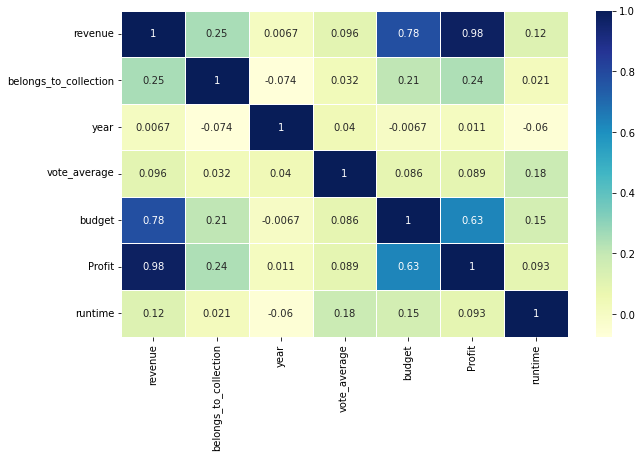

In [154]:
correlations = movies_data.corr()
f,ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

array([[<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'belongs_to_collection'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'runtime'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

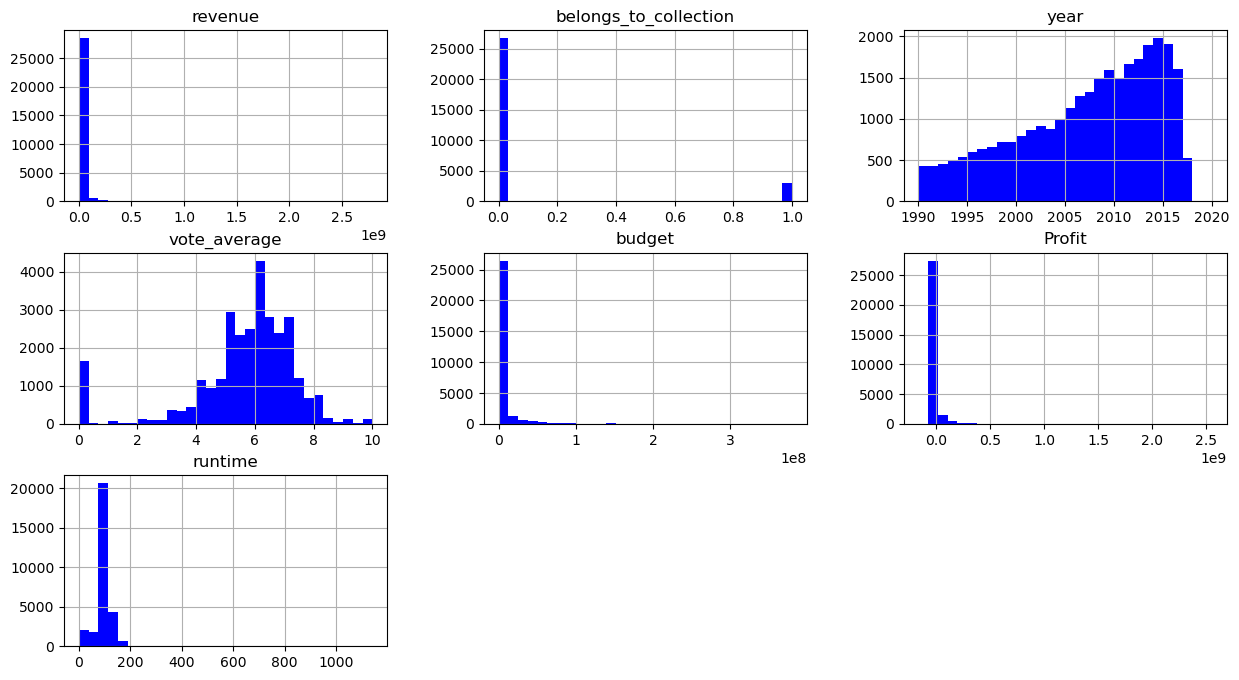

In [95]:
movies_data.hist(bins=30,figsize=(15,8),color='b')

In [96]:
from sklearn.model_selection import train_test_split
X = movies_data.drop('Profit',axis=1)
y = movies_data['Profit']
X.shape,y.shape

((29737, 7), (29737,))

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [99]:
pred_lm=model.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('The mean squared error using Linear regression is: ',mean_squared_error(y_test,pred_lm))
print('The mean absolute error using Linear regression is: ',mean_absolute_error(y_test,pred_lm))

The mean squared error using Linear regression is:  1.2142812298786762e-12
The mean absolute error using Linear regression is:  3.786726361435177e-07


In [101]:
coefficients = model.coef_
intercept = model.intercept_

In [102]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 1.00000000e+00  1.75258247e-07 -2.61469513e-10 -1.59261795e-09
 -1.33296683e-08 -1.00000000e+00  5.58670500e-11]
Intercept: 3.470107913017273e-06


In [106]:
print(model.score(X_train,y_train))

1.0


In [122]:
expected = X_train.y_train
predicted = model.predict(X_test,y_test)

AttributeError: 'DataFrame' object has no attribute 'y_train'

In [107]:
##Linear regression model to show most important predictors to profits 
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [103]:
movies_test['popularity'] = movies_test['popularity'].astype(float)

NameError: name 'movies_test' is not defined

In [95]:
movies_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29684 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   revenue                29684 non-null  float64
 1   belongs_to_collection  29684 non-null  int64  
 2   popularity             29684 non-null  float64
 3   year                   29684 non-null  int64  
 4   vote_average           29684 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.4 MB


In [85]:
X, y = movies_test.drop('revenue', axis=1), movies_sub['revenue']

In [86]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25)


In [88]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.25386025839584003

In [103]:
reg.fit(train_X,train_y)

LinearRegression()

In [108]:
training_data, testing_data = train_test_split(movies_data, test_size=0.3, random_state=25)

In [109]:
print('\ntraining_data data frame (rows, columns): ',training_data.shape)
print(training_data.head())
# check test data frame
print('\ntesting_data data frame (rows, columns): ',testing_data.shape)
print(testing_data.head())


training_data data frame (rows, columns):  (20815, 8)
        revenue  belongs_to_collection popularity  year  vote_average  \
31521       0.0                      0   0.652118  2007           5.3   
18453   22000.0                      0   7.406609  2011           5.7   
22160       0.0                      0   7.152793  2013           4.3   
33829  117629.0                      0   1.675406  2012           6.0   
19666       0.0                      1   2.833747  2012           5.4   

           budget      Profit  runtime  
31521   2691570.0  -2691570.0    114.0  
18453   3000000.0  -2978000.0    112.0  
22160         0.0         0.0     89.0  
33829  12000000.0 -11882371.0    108.0  
19666         0.0         0.0    112.0  

testing_data data frame (rows, columns):  (8922, 8)
           revenue  belongs_to_collection popularity  year  vote_average  \
34448          0.0                      0   0.375371  1998           6.3   
21701          0.0                      0   7.486516  2

In [133]:
##Changing popularity to float to run model
training_data['popularity'] = training_data['popularity'].astype(float)
testing_data['popularity'] = testing_data['popularity'].astype(float)

In [137]:
import statsmodels.formula.api as smf
np.random.seed(1234)
# Model with compensation as the dependent variable 
my_model = str('Profit ~ budget + vote_average + popularity + runtime')

# fit the model to the training set
train_model_fit = smf.ols(formula = my_model, data = training_data).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
training_data['predict_profit'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
testing_data['predict_profit'] = train_model_fit.predict(testing_data)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3983.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:11:36   Log-Likelihood:            -3.9681e+05
No. Observations:               20815   AIC:                         7.936e+05
Df Residuals:                   20810   BIC:                         7.937e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.373e+06   1.19e+06     -6.194   

In [162]:
np.random.seed(1234)
# Model with compensation as the dependent variable 
my_model = str('vote_average ~ budget+ popularity + runtime+Profit')

# fit the model to the training set
train_model_fit = smf.ols(formula = my_model, data = training_data).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
training_data['predict_vote'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
testing_data['predict_vote'] = train_model_fit.predict(testing_data)

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     239.2
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          3.44e-201
Time:                        14:03:44   Log-Likelihood:                -41721.
No. Observations:               20815   AIC:                         8.345e+04
Df Residuals:                   20810   BIC:                         8.349e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8463      0.032    150.754      0.0

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45528     0.661558
45529     5.683753
45531     0.178241
45532     0.903007
45534     0.163015
Name: popularity, Length: 29737, dtype: object

In [1]:
##Natural Language Processing to Determine the Best Movie Title and Description 
import os
import sys
import random
import nltk
from nltk.corpus import stopwords


In [44]:
top_gross = merged_movies[merged_movies['Profit']>100000000]

In [45]:
top_gross.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,spoken_languages,status,title,vote_average,vote_count,cast,crew,Profit,production_company_name_only_first,year
0,False,1,30000000.0,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],...,[English],Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",343554033.0,Pixar Animation Studios,1995
1,False,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],...,"[English, Français]",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",197797249.0,TriStar Pictures,1995
5,False,0,60000000.0,"[Action, Crime, Drama]",949.0,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[US],...,"[English, Español]",Released,Heat,7.7,1886.0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",127436818.0,Regency Enterprises,1995
9,False,1,58000000.0,"[Adventure, Action, Thriller]",710.0,en,James Bond must unmask the mysterious head of ...,14.686036,"[United Artists, Eon Productions]","[GB, US]",...,"[English, Pусский, Español]",Released,GoldenEye,6.6,1194.0,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",294194034.0,United Artists,1995
16,False,0,16500000.0,"[Drama, Romance]",4584.0,en,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,"[Columbia Pictures Corporation, Mirage Enterpr...","[GB, US]",...,[English],Released,Sense and Sensibility,7.2,364.0,"[{'cast_id': 6, 'character': 'Marianne Dashwoo...","[{'credit_id': '52fe43cec3a36847f807101f', 'de...",118500000.0,Columbia Pictures Corporation,1995


In [47]:
top_gross_overview = top_gross[['overview','title','Profit']]

In [49]:
top_gross_overview.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 45237
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   overview  977 non-null    object 
 1   title     977 non-null    object 
 2   Profit    977 non-null    float64
dtypes: float64(1), object(2)
memory usage: 30.5+ KB


In [51]:
#Tokenizing words
movie_overview = []
# add all the spam
for o in top_gross_overview['overview']:
    tokens = nltk.word_tokenize(o)
    movie_overview.append(tokens)

In [54]:
##removing punctuation and lower casing words and removing stopwords using regular expressions
import re 
pattern = re.compile('^[^a-z]+$')
def alpha_filter(w):
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False


stopwords = nltk.corpus.stopwords.words('english')
subjectstopword = ['subject']
stopwords.extend(subjectstopword)

#Storing the cleaned tokens in a spam and ham texts lists 
ovewviewcleaned = []
for m in movie_overview:
    #lower = m.lower()
    #tokens = nltk.word_tokenize(spam)
    alpha_overview = [w for w in m if not alpha_filter(w)]
    stoppedwords = [word for word in alpha_overview if word.lower() not in stopwords]
    ovewviewcleaned.append(stoppedwords)


print(ovewviewcleaned[1])

['siblings', 'Judy', 'Peter', 'discover', 'enchanted', 'board', 'game', 'opens', 'door', 'magical', 'world', 'unwittingly', 'invite', 'Alan', 'adult', "'s", 'trapped', 'inside', 'game', 'years', 'living', 'room', 'Alan', "'s", 'hope', 'freedom', 'finish', 'game', 'proves', 'risky', 'three', 'find', 'running', 'giant', 'rhinoceroses', 'evil', 'monkeys', 'terrifying', 'creatures']


In [55]:
##Creating bag of word and frequency distribution for data
movieBOW = []
for top in ovewviewcleaned:
    for t in top: 
        movieBOW.append(t)

movieFD = nltk.FreqDist(movieBOW)

for word, freq in movieFD.most_common(10):
    print(word, freq)
    

's 554
world 163
life 154
must 139
new 121
find 117
one 113
young 98
man 93
help 85


In [72]:
for word, freq in movieFD.most_common(75):
    print(word, freq)

's 554
world 163
life 154
must 139
new 121
find 117
one 113
young 98
man 93
help 85
family 85
love 84
back 80
two 77
time 73
finds 69
home 68
years 66
get 60
team 58
story 57
friends 56
save 55
father 55
takes 54
New 54
named 54
take 54
become 53
mysterious 52
lives 50
evil 49
mission 49
woman 48
day 47
n't 47
true 47
way 47
battle 46
becomes 45
discovers 45
make 45
old 44
Earth 43
John 43
son 42
wife 41
first 41
face 41
York 40
former 39
agent 39
soon 38
forces 38
Jack 38
secret 38
race 37
go 37
set 37
forced 36
city 36
friend 36
three 35
journey 35
war 35
group 35
stop 35
girl 35
comes 34
last 34
discover 33
game 33
meets 33
people 33
past 33


In [58]:
##Creating bigrams for Movie Overview
#creating bigrams using the nlkt collocations package 
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
#Bigrams for Macbeth
MBfinder = BigramCollocationFinder.from_words(movieBOW)
movie_scored = MBfinder.score_ngrams(bigram_measures.raw_freq)

In [59]:
movie_sorted = sorted(movie_scored)

movie_BGS_50 = movie_sorted[:50]

In [60]:
##Listing top 50 bigrams for Macbeth
for m in movie_BGS_50:
    print(m)

(("'60s", 'help'), 3.34817691766833e-05)
(("'70s", 'kingpin'), 3.34817691766833e-05)
(("'80s", 'child'), 3.34817691766833e-05)
(("'Assassins", 'society'), 3.34817691766833e-05)
(("'Baby", 'Houseman'), 3.34817691766833e-05)
(("'Beauty", 'Beast'), 3.34817691766833e-05)
(("'Bertie", 'reluctantly'), 3.34817691766833e-05)
(("'Bone", 'Density'), 3.34817691766833e-05)
(("'Covenant", 'discovers'), 3.34817691766833e-05)
(("'Dragon", 'Emperor'), 3.34817691766833e-05)
(("'Dumbledore", "'s"), 3.34817691766833e-05)
(("'Forrest", 'Gump'), 3.34817691766833e-05)
(("'Ghost", 'Rider'), 3.34817691766833e-05)
(("'Goose", 'Bradshaw'), 3.34817691766833e-05)
(("'Hitch", 'Hitchens'), 3.34817691766833e-05)
(("'Maverick", 'Mitchell'), 3.34817691766833e-05)
(("'Miracle", 'Hudson'), 3.34817691766833e-05)
(("'Non-Humans", 'moved'), 3.34817691766833e-05)
(("'Please", 'look'), 3.34817691766833e-05)
(("'Precrime", 'cop'), 3.34817691766833e-05)
(("'Property", 'Half-Blood'), 3.34817691766833e-05)
(("'Rhodey", 'Rhodes')

In [65]:
##Using sentiment analysis to overview. 
#importing textblob analyzer
from textblob import TextBlob, Word, Blobber
movie_sentiment = []
for sent in top_gross_overview['overview']:
    s = TextBlob(sent) #storing the textblob analysis 
    analysis = s.sentiment
    polarity = analysis.polarity # calculating the polarity scores and storing in a list
    movie_sentiment.append(polarity)

print(movie_sentiment[5:])

[-0.33125, 0.07285714285714287, 0.022222222222222223, 0.32916666666666666, -1.586032892321652e-17, -0.12916666666666668, 0.3472727272727273, 0.041999999999999996, -0.025, 0.0, 0.10606060606060606, 0.029166666666666646, 0.09166666666666667, 0.12, -0.03051948051948052, 0.005952380952380963, -0.016666666666666666, 0.3833333333333333, 0.15324675324675324, 0.16666666666666666, 0.09805194805194806, 0.15, -0.07500000000000001, 0.16666666666666666, -0.15, 0.16666666666666666, 0.016666666666666653, 0.0, -0.004545454545454547, 0.18, -0.5, 0.030606060606060616, 0.30892857142857144, 0.05714285714285714, 0.1, 0.033333333333333326, -0.03749999999999998, -0.35000000000000003, -0.06666666666666667, -0.375, 0.045454545454545456, 0.35, -0.19999999999999998, -0.1, -0.1380952380952381, 0.15, 0.3, 0.0, -0.037500000000000006, 0.03319128787878788, -0.03605442176870749, 0.175, 0.22000000000000003, 0.2, -0.07738095238095238, -0.18571428571428572, 0.06666666666666667, -0.13999999999999999, 0.05416666666666667, 

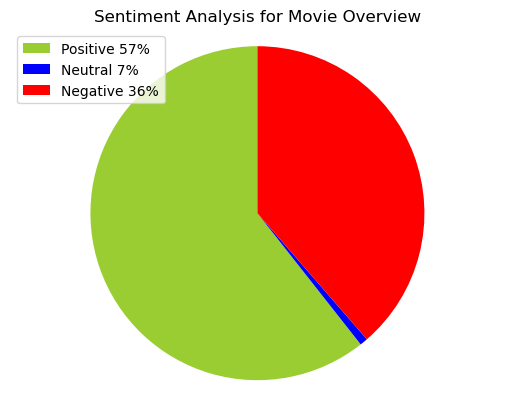

In [86]:
##Couting how many of the spam_sentiments were positive negative or neutral 
neg = 0
neutral = 0
pos = 0 
for m in movie_sentiment:
    if m > 0:
        pos+=1
    elif m == 0:
        neutral+=1
    elif m < 0:
        neg+=1


##Creating pie charts to vizualize the sentiment analysis  
#Creating percentages of positive, neutral, or negative tweets 
positive = (round((pos/len(movie_sentiment)),2)*100)
negative = (round((neg/ len(movie_sentiment)),2)*100)
neutral = (round((neutral/len(movie_sentiment)),2)*100)

#Creating labels for pie chart using fstrings 
pos_label = f"Positive {int(57)}%"
neutral_label = f"Neutral {int(neutral)}%"
neg_label = f"Negative {int(negative)}%"

import matplotlib.pyplot as plt

#Creating PieCart for sentiment analysis 

labels = [ pos_label,neutral_label,neg_label]
sizes = [pos, neutral, neg]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis for Movie Overview' )
plt.axis('equal')
plt.show()

In [74]:
##creating separate lists for the word and frequencies to create a simple bar graph. 
word_list=[]
word_count=[]
for word, freq in movieFD.most_common(11):
    word_list.append(word)
    word_count.append(freq)
    
print(word_list)
print(word_count)

["'s", 'world', 'life', 'must', 'new', 'find', 'one', 'young', 'man', 'help', 'family']
[554, 163, 154, 139, 121, 117, 113, 98, 93, 85, 85]


In [75]:
#Removing 's from the lists 
word_list = word_list[1:10]
word_count = word_count[1:10]
print(word_list)
print(word_count)

['world', 'life', 'must', 'new', 'find', 'one', 'young', 'man', 'help']
[163, 154, 139, 121, 117, 113, 98, 93, 85]


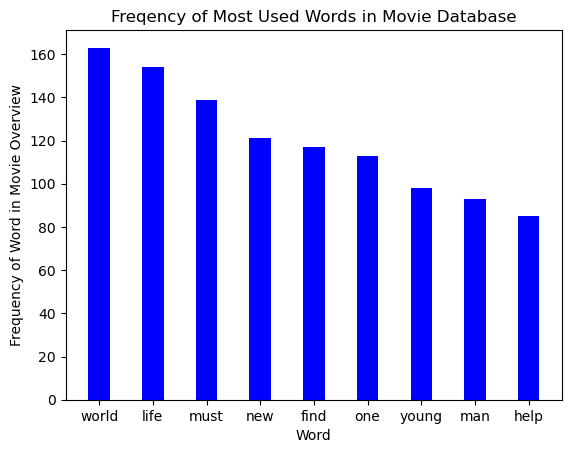

In [76]:
##Visualization of POS Frequency in Alice in Wonderland
import matplotlib.pyplot as plt
plt.bar(word_list, word_count, color ='blue',width = 0.4)
plt.xlabel("Word")
plt.ylabel("Frequency of Word in Movie Overview")
plt.title("Freqency of Most Used Words in Movie Database")
plt.show()